# Explore here

En el presente proyecto queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. 

## Paso 1: Carga del conjunto de datos

In [123]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


In [124]:
total_data.shape

(20640, 9)

In [125]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [126]:
total_data.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42
...,...,...,...,...,...,...,...,...,...
20635,1.56,25.0,5.05,1.13,845.0,2.56,39.48,-121.09,0.78
20636,2.56,18.0,6.11,1.32,356.0,3.12,39.49,-121.21,0.77
20637,1.70,17.0,5.21,1.12,1007.0,2.33,39.43,-121.22,0.92
20638,1.87,18.0,5.33,1.17,741.0,2.12,39.43,-121.32,0.85


In [127]:
total_data.drop(["HouseAge", "AveRooms", "AveBedrms","Population","AveOccup","MedHouseVal"], axis = 1, inplace = True)
total_data.head()

,MedInc,Latitude,Longitude
0,8.33,37.88,-122.23
1,8.30,37.86,-122.22
2,7.26,37.85,-122.24
3,5.64,37.85,-122.25
4,3.85,37.85,-122.25


In [128]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

MedInc       0.0
Latitude     0.0
Longitude    0.0
dtype: float64

<Axes: xlabel='Longitude', ylabel='Latitude'>

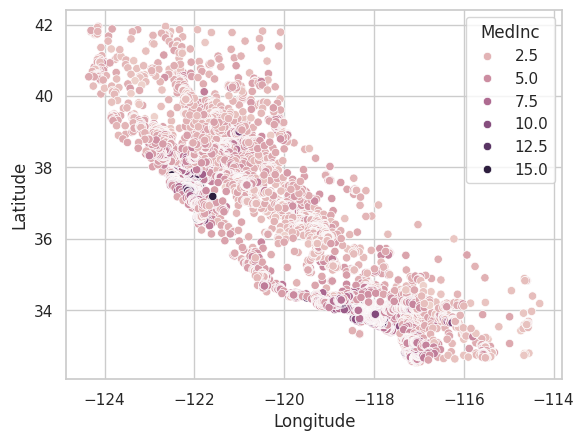

In [129]:
sns.scatterplot(data = total_data, x = 'Longitude', y = 'Latitude', hue = 'MedInc')

In [130]:
total_data.describe()

,MedInc,Latitude,Longitude
count,20640.00,20640.00,20640.00
mean,3.87,35.63,-119.57
std,1.90,2.14,2.00
min,0.50,32.54,-124.35
25%,2.56,33.93,-121.80
50%,3.53,34.26,-118.49
75%,4.74,37.71,-118.01
max,15.00,41.95,-114.31


In [131]:

from sklearn.model_selection import train_test_split

num_variables = ["Longitude", "Latitude", "MedInc"]

X_CON = total_data[num_variables]
X_train, X_test = train_test_split(X_CON, test_size = 0.2, random_state = 42)

In [132]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=42, n_init=10)
model.fit(X_train)

,n_clusters,6
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [133]:
X_train['cluster'] = model.predict(X_train)
X_test['cluster'] = model.predict(X_test)

X_train.head()


,Longitude,Latitude,MedInc,cluster
14196,-117.03,32.71,3.26,2
8267,-118.16,33.77,3.81,2
17445,-120.48,34.66,4.16,0
14265,-117.11,32.69,1.94,2
2271,-119.80,36.78,3.55,0


In [ ]:
#grafico cluster

KNN 

In [134]:
x_train_knn = X_train[num_variables]
x_test_knn = X_test[num_variables]
y_train = X_train["cluster"]
y_test = X_test["cluster"]

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

model = KNeighborsClassifier(
        n_neighbors=5, 
        metric='euclidean', 
        weights='distance',
)
model.fit(x_train_knn, y_train)
y_pred = model.predict(x_train_knn)
accuracy_results.append(accuracy_score(y_train, y_pred))


y_pred_test = model.predict(x_test_knn)
accuracy_results.append(accuracy_score(y_test, y_pred_test))


print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))



Accuracy: [1.0, 0.9920058139534884]
Mejor Accuracy: 1.0


Confusion matrix:
 [[ 333    0    0    0    5    0]
 [   0   85    0    2    0    2]
 [   0    0 1483    5    0    0]
 [   1    0    8  727    0    0]
 [   0    0    0    0  955    2]
 [   1    0    0    0    7  512]]


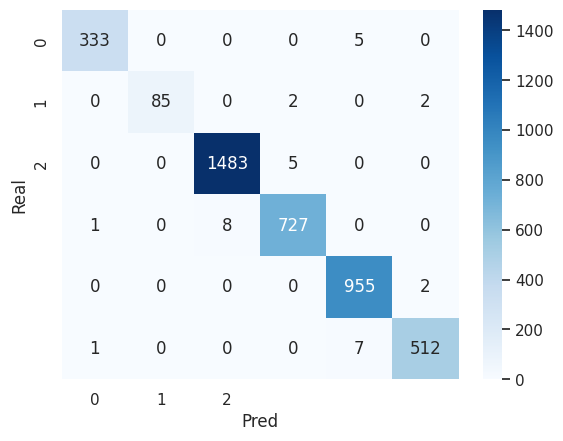

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

Classificaion report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       338
           1       1.00      0.96      0.98        89
           2       0.99      1.00      1.00      1488
           3       0.99      0.99      0.99       736
           4       0.99      1.00      0.99       957
           5       0.99      0.98      0.99       520

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.99      4128
weighted avg       0.99      0.99      0.99      4128



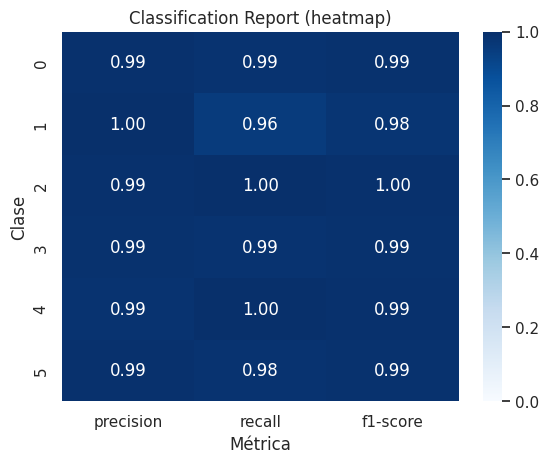

In [138]:
cr = classification_report(y_test, y_pred_test)
print("Classificaion report:\n", cr)

rep = classification_report(
    y_test, y_pred_test,
    output_dict=True,
    target_names=["0", "1", "2", "3", "4", "5"]
)
total_data = pd.DataFrame(rep).T

heat = total_data.loc[["0", "1", "2", "3", "4", "5"], ["precision", "recall", "f1-score"]]

sns.heatmap(heat, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="Blues")
plt.title("Classification Report (heatmap)")
plt.ylabel("Clase"); plt.xlabel("Métrica")
plt.show()